In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import sys
from pathlib import Path

sys.path.append(str(Path().cwd().parent))

In [16]:
import warnings

warnings.filterwarnings('ignore')

In [17]:
# обратите внимание, модуля model нет в корне ваших репозиториев, тк он содержит ответы, этот модуль появится
# после прохождения задания
import model
import load_dataset
from plotting import plot_ts

### Возьмем временной ряд

In [18]:
dataset = load_dataset.Dataset('../data/dataset/')

In [19]:
ts = dataset['daily-min-temperatures.csv']

In [20]:
ts.head()

1981-01-01
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
Name: 20.7, dtype: float64

<Axes: xlabel='1981-01-01'>

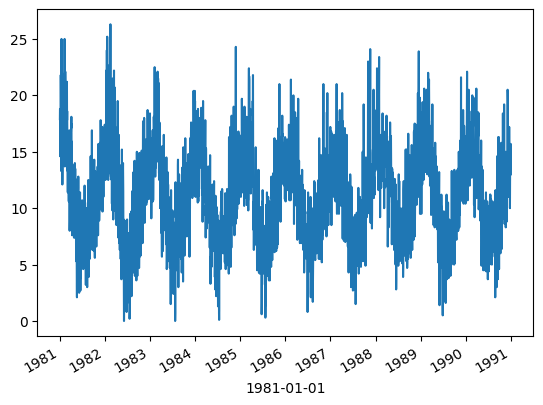

In [21]:
ts.plot()

###  Зададим гранулярность

In [22]:
# гранулярность, она же частота временного ряда, задается в согласии с форматов iso6801
# https://en.wikipedia.org/wiki/ISO_8601
granularity = 'P1D'

In [23]:
import isodate
isodate.parse_duration(granularity)

datetime.timedelta(days=1)

### Зададим ширину окна

In [24]:
num_lags = 7

### Зададим модель

In [25]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression

### Создадим экзэмпляр класса TimeSeriesPredictor

In [26]:
predictor = model.TimeSeriesPredictor(
    granularity=granularity,
    num_lags=num_lags,
    model=Model
)

### Посмотрим, как работает метод transform_into_matrix

In [27]:
lags_matrix = predictor.transform_into_matrix(ts)

In [28]:
ts[:20]

1981-01-01
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
1981-01-07    15.8
1981-01-08    17.4
1981-01-09    21.8
1981-01-10    20.0
1981-01-11    16.2
1981-01-12    13.3
1981-01-13    16.7
1981-01-14    21.5
1981-01-15    25.0
1981-01-16    20.7
1981-01-17    20.6
1981-01-18    24.8
1981-01-19    17.7
1981-01-20    15.5
1981-01-21    18.2
Name: 20.7, dtype: float64

In [29]:
lags_matrix[:10]

,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,lag_0
1981-01-01,,,,,,,,
1981-01-09,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8
1981-01-10,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0
1981-01-11,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2
1981-01-12,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3
1981-01-13,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7
1981-01-14,15.8,17.4,21.8,20.0,16.2,13.3,16.7,21.5
1981-01-15,17.4,21.8,20.0,16.2,13.3,16.7,21.5,25.0
1981-01-16,21.8,20.0,16.2,13.3,16.7,21.5,25.0,20.7
1981-01-17,20.0,16.2,13.3,16.7,21.5,25.0,20.7,20.6


### Обучим модель

In [30]:
predictor.fit(ts)

### Предскажем следующие несколько точек

In [31]:
prediction = predictor.predict_next(ts, n_steps=365)

In [32]:
prediction

1991-01-01    12.811619
1991-01-02    13.175679
1991-01-03    13.268553
1991-01-04    13.216781
1991-01-05    13.101261
                ...    
1991-12-27    11.146489
1991-12-28    11.146489
1991-12-29    11.146489
1991-12-30    11.146489
1991-12-31    11.146489
Length: 365, dtype: float64

In [33]:
plot_ts(ts, prediction)

Loading BokehJS ...

### Зададим сторонние признаки

In [34]:
import math

from pandas._libs.tslibs.timestamps import Timestamp


def get_month_sin(timestamp: Timestamp) -> float:
    theta = timestamp.month * (2*math.pi / 12)
    return math.sin(theta)


def get_month_cos(timestamp: Timestamp) -> float:
    theta = timestamp.month * (2*math.pi / 12)
    return math.cos(theta)


def get_day_sin(timestamp: Timestamp) -> float:
    theta = timestamp.day * (2*math.pi / timestamp.days_in_month)
    return math.sin(theta)


def get_day_cos(timestamp: Timestamp) -> float:
    theta = timestamp.day * (2*math.pi / timestamp.days_in_month)
    return math.cos(theta)


def get_dayofweek_sin(timestamp: Timestamp) -> float:
    theta = timestamp.dayofweek * (2*math.pi / 7)
    return math.sin(theta)


def get_dayofweek_cos(timestamp: Timestamp) -> float:
    theta = timestamp.dayofweek * (2*math.pi / 7)
    return math.cos(theta)


def get_hour_sin(timestamp: Timestamp) -> float:
    theta = timestamp.hour * (2*math.pi / 24)
    return math.sin(theta)


def get_hour_cos(timestamp: Timestamp) -> float:
    theta = timestamp.hour * (2*math.pi / 24)
    return math.cos(theta)


def get_minute_sin(timestamp: Timestamp) -> float:
    theta = timestamp.minute * (2*math.pi / 60)
    return math.sin(theta)


def get_minute_cos(timestamp: Timestamp) -> float:
    theta = timestamp.minute * (2*math.pi / 60)
    return math.cos(theta)


datetime_mappers = {
    'month_sin': get_month_sin,
    'month_cos': get_month_cos,
    'day_sin': get_day_sin,
    'day_cos': get_day_cos,
    'dayofweek_sin': get_dayofweek_sin,
    'dayofweek_cos': get_dayofweek_cos,
    'hour_sin': get_hour_sin,
    'hour_cos': get_hour_cos,
    'minute_sin': get_minute_sin,
    'minute_cos': get_minute_cos,
}

### Добавим сторонние признаки

In [35]:
predictor = model.TimeSeriesPredictor(
    granularity=granularity,
    num_lags=num_lags,
    model=Model,
    mappers=datetime_mappers,
)

In [36]:
feature_matrix = predictor.enrich(lags_matrix)

In [37]:
feature_matrix

,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,lag_0,month_sin,month_cos,day_sin,day_cos,dayofweek_sin,dayofweek_cos,hour_sin,hour_cos,minute_sin,minute_cos
1981-01-01,,,,,,,,,,,,,,,,,,
1981-01-09,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,5.000000e-01,0.866025,9.680771e-01,-0.250653,-0.433884,-0.900969,0.0,1.0,0.0,1.0
1981-01-10,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,5.000000e-01,0.866025,8.978045e-01,-0.440394,-0.974928,-0.222521,0.0,1.0,0.0,1.0
1981-01-11,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,5.000000e-01,0.866025,7.907757e-01,-0.612106,-0.781831,0.623490,0.0,1.0,0.0,1.0
1981-01-12,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,5.000000e-01,0.866025,6.513725e-01,-0.758758,0.000000,1.000000,0.0,1.0,0.0,1.0
1981-01-13,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,5.000000e-01,0.866025,4.853020e-01,-0.874347,0.781831,0.623490,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,15.4,13.1,13.2,13.9,10.0,12.9,14.6,14.0,-2.449294e-16,1.000000,-7.247928e-01,0.688967,0.433884,-0.900969,0.0,1.0,0.0,1.0
1990-12-28,13.1,13.2,13.9,10.0,12.9,14.6,14.0,13.6,-2.449294e-16,1.000000,-5.712682e-01,0.820763,-0.433884,-0.900969,0.0,1.0,0.0,1.0
1990-12-29,13.2,13.9,10.0,12.9,14.6,14.0,13.6,13.5,-2.449294e-16,1.000000,-3.943559e-01,0.918958,-0.974928,-0.222521,0.0,1.0,0.0,1.0


In [38]:
predictor.mappers

{'month_sin': <function __main__.get_month_sin(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'month_cos': <function __main__.get_month_cos(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'day_sin': <function __main__.get_day_sin(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'day_cos': <function __main__.get_day_cos(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'dayofweek_sin': <function __main__.get_dayofweek_sin(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'dayofweek_cos': <function __main__.get_dayofweek_cos(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'hour_sin': <function __main__.get_hour_sin(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'hour_cos': <function __main__.get_hour_cos(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> float>,
 'minute_sin': <function __main__.get_minute_sin(timestamp: pandas._libs.tslibs.timestamps.Timestamp) -> flo

In [39]:
feature_matrix

,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,lag_0,month_sin,month_cos,day_sin,day_cos,dayofweek_sin,dayofweek_cos,hour_sin,hour_cos,minute_sin,minute_cos
1981-01-01,,,,,,,,,,,,,,,,,,
1981-01-09,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,5.000000e-01,0.866025,9.680771e-01,-0.250653,-0.433884,-0.900969,0.0,1.0,0.0,1.0
1981-01-10,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,5.000000e-01,0.866025,8.978045e-01,-0.440394,-0.974928,-0.222521,0.0,1.0,0.0,1.0
1981-01-11,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,5.000000e-01,0.866025,7.907757e-01,-0.612106,-0.781831,0.623490,0.0,1.0,0.0,1.0
1981-01-12,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,5.000000e-01,0.866025,6.513725e-01,-0.758758,0.000000,1.000000,0.0,1.0,0.0,1.0
1981-01-13,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,5.000000e-01,0.866025,4.853020e-01,-0.874347,0.781831,0.623490,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,15.4,13.1,13.2,13.9,10.0,12.9,14.6,14.0,-2.449294e-16,1.000000,-7.247928e-01,0.688967,0.433884,-0.900969,0.0,1.0,0.0,1.0
1990-12-28,13.1,13.2,13.9,10.0,12.9,14.6,14.0,13.6,-2.449294e-16,1.000000,-5.712682e-01,0.820763,-0.433884,-0.900969,0.0,1.0,0.0,1.0
1990-12-29,13.2,13.9,10.0,12.9,14.6,14.0,13.6,13.5,-2.449294e-16,1.000000,-3.943559e-01,0.918958,-0.974928,-0.222521,0.0,1.0,0.0,1.0


In [40]:
predictor.fit(ts)

In [41]:
prediction = predictor.predict_next(ts, n_steps=365)

In [42]:
plot_ts(ts, prediction)

Loading BokehJS ...

#### Trying to beat arima in alcohol sales predictions

In [55]:
from sklearn.linear_model import Ridge

In [56]:
ts = dataset['alcohol_sales.csv']

In [57]:
ts_train, ts_test = ts[:270], ts[270:]

In [58]:
Model = Ridge

In [59]:
predictor = model.TimeSeriesPredictor(
    granularity='P31D',
    num_lags=24,
    model=Model,
    mappers=datetime_mappers,
)

In [60]:
predictor.fit(ts_train)

In [61]:
predict = predictor.predict_next(ts_train, n_steps=len(ts_test))

In [62]:
plot_ts(ts, predict)

Loading BokehJS ...

In [64]:
predictor.model.coef_

array([ 2.83968520e-01, -1.45444854e-01,  9.97478443e-02, -2.38016829e-01,
        1.18589560e-01, -1.12270841e-01,  9.45814977e-02, -1.39117013e-01,
        6.46566632e-02, -3.43531888e-01, -2.75383381e-02, -2.25251555e-01,
        6.83798051e-01,  1.13957673e-01, -1.52532429e-01,  2.06191792e-01,
       -1.17601760e-01,  1.21519601e-01, -2.59613836e-02,  1.74094592e-01,
       -2.02333306e-02,  3.44241098e-01,  4.00368193e-02,  2.11003262e-01,
       -6.55509452e+01, -1.45690900e+02, -4.02672392e+01,  8.68735671e+00,
        9.03801148e+01,  2.35171071e+02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [66]:
param_grid = {
    'num_lags': [12, 24, 36],
    'alpha': [0, 1, 3, 10],
}

In [67]:
from itertools import product

In [68]:
from sklearn.metrics import mean_squared_error

In [76]:
scores = {}

for n_lags, alpha in product(*list(param_grid.values())):
    
    predictor = model.TimeSeriesPredictor(
        granularity='P31D', model=Model, num_lags=n_lags, alpha=alpha)
    
    predictor.fit(ts_train)
    predicted = predictor.predict_next(ts_train, n_steps=len(ts_test))
    error = mean_squared_error(ts_test, predicted)
    scores[(n_lags, alpha)] = error
    print(n_lags, alpha, error)

12 0 725526.813879329
12 1 725526.8138685325
12 3 725526.8138469467
12 10 725526.8137714167
24 0 411959.6892644884
24 1 411959.72201801144
24 3 411959.78752503946
24 10 411960.01679940376
36 0 209858.39723537417
36 1 209858.4059955176
36 3 209858.42351579687
36 10 209858.48483695215


In [77]:
best_params = sorted(scores.items(), key=lambda x: x[1], )[0][0]

In [78]:
best_params

(36, 0)

In [80]:
num_lags, alpha = best_params

In [82]:
predictor = model.TimeSeriesPredictor(
    granularity='P31D',
    num_lags=num_lags,
    model=Model,
    alpha=alpha,
)

In [83]:
predictor.fit(ts_train)

In [84]:
predict = predictor.predict_next(ts_train, n_steps=len(ts_test))

In [85]:
plot_ts(ts, predict)

Loading BokehJS ...